In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import itertools
import pandas as pd

In [2]:
address = 'bc1qxy2kgdygjrsqtzq2n0yrf2493p83kkfjhx0wlh'

In [3]:
r = requests.get(f'https://api.blockchain.info/haskoin-store/btc/address/{address}/transactions/full?limit=1000')
data = r.json()

In [4]:
txns = pd.DataFrame(itertools.chain.from_iterable([
    [(tx['time'], outp['value']) for outp in tx['outputs'] if outp['address'] == address]
    for tx in data
]), columns=['time', 'btc']).sort_values(by='time')

txns['time'] = pd.to_datetime(txns['time'], unit='s')
txns['usd'] = txns['btc'] / 100_000_000 * 9201.99
txns['total'] = pd.Series.cumsum(txns['usd'])

In [5]:
print('Len:\t', len(txns))
print('Max:\t', max(txns['usd']))
print('Sum:\t', sum(txns['usd']))

Len:	 413
Max:	 41964.4163787282
Sum:	 118360.78188711828


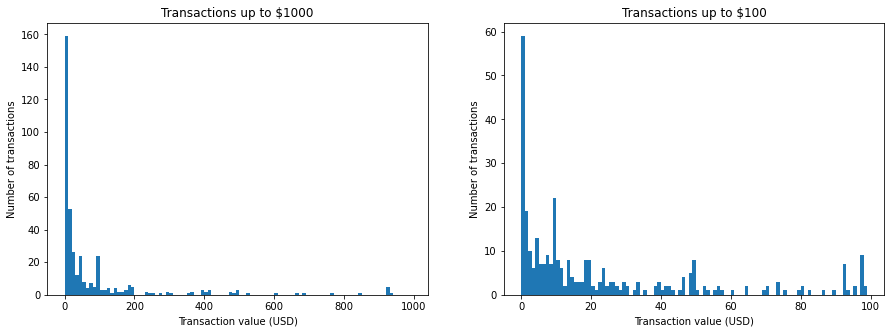

In [6]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Transactions up to $1000')
plt.ylabel('Number of transactions')
plt.xlabel('Transaction value (USD)')
plt.hist(txns['usd'], bins=np.arange(0, 1000, 10))

plt.subplot(1, 2, 2)
plt.title('Transactions up to $100')
plt.ylabel('Number of transactions')
plt.xlabel('Transaction value (USD)')
_ = plt.hist(txns['usd'], bins=np.arange(0, 100, 1))

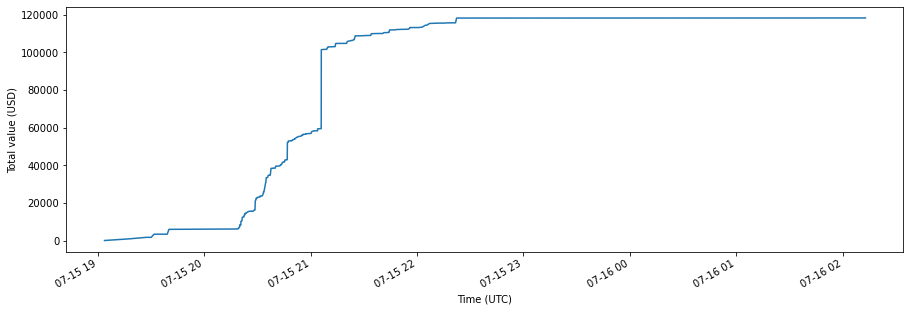

In [7]:
fig = plt.figure(figsize=(15, 5))
plt.ylabel('Total value (USD)')
plt.xlabel('Time (UTC)')
plt.plot(txns['time'], txns['total'])
fig.autofmt_xdate()